In [43]:
# Declaración de constantes
NUM_EPISODES = 100
GAMMA = 0.9
REWARD_THRESHOLD = 100
LEARNING_RATE = 0.6
EPSILON = 0.15

T_MAX = 100

In [44]:
import gymnasium as gym
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from gymnasium import Wrapper

In [45]:
env = gym.make("Taxi-v3",render_mode="human")

In [46]:
def test_episode(agent, env):
    env.reset()
    is_done = False
    t = 0

    while not is_done:
        action = agent.select_action()
        state, reward, is_done, truncated, info = env.step(action)
        t += 1
    return state, reward, is_done, truncated, info

def draw_rewards(rewards):
    data = pd.DataFrame({'Episode': range(1, len(rewards) + 1), 'Reward': rewards})
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Episode', y='Reward', data=data)

    plt.title('Rewards Over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.grid(True)
    plt.tight_layout()

    plt.show()
    
def print_policy(policy):
    visual_help = {0:'<', 1:'v', 2:'>', 3:'^'}
    policy_arrows = [visual_help[x] for x in policy]
    print(np.array(policy_arrows).reshape([-1, 4]))

In [56]:
class QLearningAgent:
    def __init__(self, env, gamma, learning_rate, epsilon, t_max):
        self.env = env
        self.Q = np.zeros((env.observation_space.n, env.action_space.n))
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.t_max = t_max
    def change_epsilon(self, epsilon):
        self.epsilon = epsilon
        
    def select_action(self, state, mask,training=True):
        if training and random.random() <= self.epsilon:
            return np.random.choice(self.env.action_space.n)
        else:
            values = np.asarray(self.Q[state,])+np.array(mask)*10
            values[4]=values[4]+0.01*mask[4]
            num=np.argmax(np.random.random(values.shape) * (values==values.max()))
            return num
        
    def update_Q(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.Q[next_state,])
        td_target = reward + self.gamma * self.Q[next_state, best_next_action]
        td_error = td_target - self.Q[state, action]
        self.Q[state, action] += self.learning_rate * td_error
        
    def learn_from_episode(self):
        state, _ = env.reset()
        total_reward = 0
        mask=[1.0,1.0,1.0,1.0,1.0,1.0]
        for i in range(self.t_max):
            action = self.select_action(state,mask)
            new_state, new_reward, is_done, truncated, info = self.env.step(action)

            mask=info['action_mask']

            total_reward += new_reward
            if((state//4)%5!=4):
                estado=state-state%4
                self.update_Q(estado, action, new_reward, new_state)
                self.update_Q(estado+1, action, new_reward, new_state)
                self.update_Q(estado+2, action, new_reward, new_state)
                self.update_Q(estado+3, action, new_reward, new_state)
            else:
                self.update_Q(state, action, new_reward, new_state)
            if is_done:
                break
            state = new_state
        return total_reward

    def policy(self):
        policy = np.zeros(env.observation_space.n) 
        for s in range(env.observation_space.n):
            policy[s] = np.argmax(np.array(self.Q[s]))        
        return policy

In [14]:
class QLearningAgent2:
    def __init__(self, env, gamma, learning_rate, epsilon, t_max):
        self.env = env
        self.Q = np.zeros((env.observation_space.n, env.action_space.n))
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.t_max = t_max
    def epsilon_chang(self,epsilon_new):
        self.epsilon=epsilon_new
    
    def select_action(self, state, mask,training=True):
        if training and random.random() <= self.epsilon:
            return np.random.choice(self.env.action_space.n)
        else:
            values = np.asarray(self.Q[state,])+np.array(mask)*1000
            val=np.random.random(values.shape)
            val[4]=val[4]+0.001
            val[5]=val[5]+0.001
            num=np.argmax(val * (val==val.max()))
            return num
        
    def update_Q(self, state, action, reward, next_state,mask):
        values = np.asarray(self.Q[state,])+np.array(mask)*1000
        val=np.random.random(values.shape)
        val[4]=val[4]+0.002
        val[5]=val[5]+0.001
        best_next_action=np.argmax(val * (val==val.max()))

        td_target = reward + self.gamma * self.Q[next_state, best_next_action]
        td_error = td_target - self.Q[state, action]
        self.Q[state, action] += self.learning_rate * td_error
        
    def learn_from_episode(self):
        state, _ = env.reset()
        total_reward = 0
        mask=[1.0,1.0,1.0,1.0,1.0,1.0]
        for i in range(self.t_max):
            action = self.select_action(state,mask)
            new_state, new_reward, is_done, truncated, info = self.env.step(action)
            mask=info['action_mask']
            total_reward += new_reward
            self.update_Q(state, action, new_reward, new_state,mask)
            
            if is_done:
                break
            state = new_state
        return total_reward

    def policy(self):
        policy = np.zeros(env.observation_space.n) 
        for s in range(env.observation_space.n):
            policy[s] = np.argmax(np.array(self.Q[s]))        
        return policy

In [48]:
class CustomTaxiWrapper(Wrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def step(self, action):
        state, reward, is_done, truncated, info = self.env.step(action)
        if((state//4)%5==4):
            reward=reward+0.9
        return state, reward, is_done, truncated, info

In [ ]:
fixed_env = CustomTaxiWrapper(env)
agent = QLearningAgent(fixed_env, gamma=GAMMA, learning_rate=LEARNING_RATE, epsilon=EPSILON, t_max=200)

New reward: -14.70000000000001
New reward: 12.900000000000004
New reward: -8.40000000000002
New reward: 18.5
New reward: 6.100000000000003
New reward: 17.2
New reward: 10.100000000000001
New reward: 13.400000000000002
New reward: 11.800000000000004
New reward: -8.70000000000001
New reward: 7.500000000000002
New reward: 16.099999999999998
New reward: 10.100000000000001
New reward: 5.100000000000003
New reward: 4.500000000000002
New reward: 7.8000000000000025
New reward: 4.600000000000005
New reward: -6.3000000000000185
New reward: -4.799999999999997
New reward: -17.900000000000013
New reward: 17.3
New reward: -3.700000000000003
New reward: 15.899999999999999
New reward: 15.400000000000002
New reward: 5.0000000000000036
New reward: 3.900000000000002
New reward: 10.400000000000002
New reward: 1.29999999999999
New reward: 18.4
New reward: 14.100000000000003
New reward: 7.100000000000003
New reward: 16.4
New reward: -7.100000000000016
New reward: 18.0
New reward: 12.500000000000002
New rewa

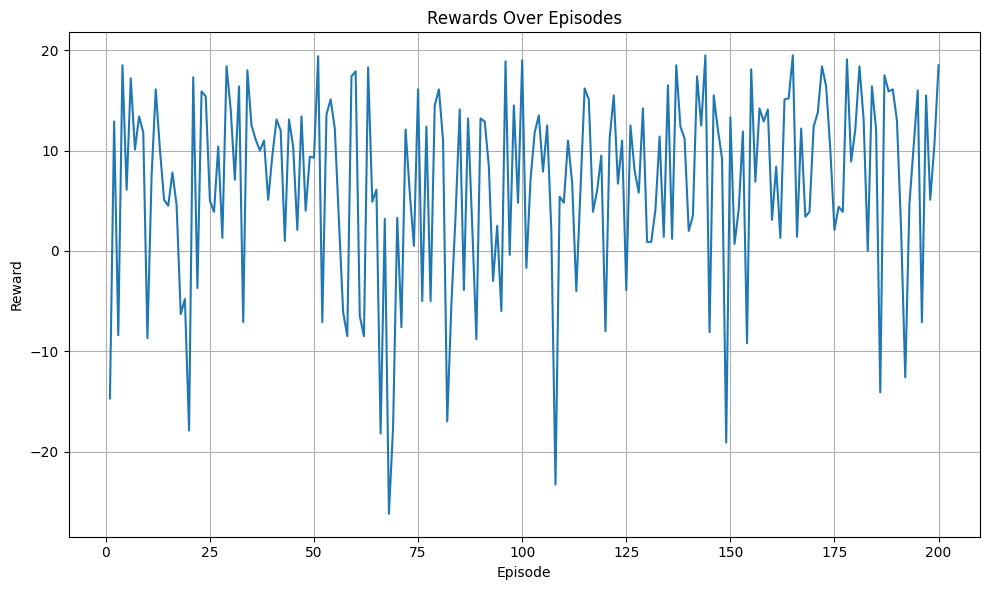

In [62]:
rewards = []
for i in range(200):
    reward = agent.learn_from_episode()
    print("New reward: " + str(reward))
    rewards.append(reward)
draw_rewards(rewards)

In [64]:
agente_final1=agent

Episode:  0
Episode:  1
Episode:  2
Episode:  3
Episode:  4
Episode:  5
Episode:  6
Episode:  7
Episode:  8
Episode:  9
Episode:  10
Episode:  11
Episode:  12
Episode:  13
Episode:  14
Episode:  15
Episode:  16
Episode:  17
Episode:  18
Episode:  19
Episode:  20
Episode:  21
Episode:  22
Episode:  23
Episode:  24
Episode:  25
Episode:  26
Episode:  27
Episode:  28
Episode:  29
Episode:  30
Episode:  31
Episode:  32
Episode:  33
Episode:  34
Episode:  35
Episode:  36
Episode:  37
Episode:  38
Episode:  39
Episode:  40
Episode:  41
Episode:  42
Episode:  43
Episode:  44
Episode:  45
Episode:  46
Episode:  47
Episode:  48
Episode:  49
Episode:  50
Episode:  51
Episode:  52
Episode:  53
Episode:  54
Episode:  55
Episode:  56
Episode:  57
Episode:  58
Episode:  59
Episode:  60
Episode:  61
Episode:  62
Episode:  63
Episode:  64
Episode:  65
Episode:  66
Episode:  67
Episode:  68
Episode:  69
Episode:  70
Episode:  71
Episode:  72
Episode:  73
Episode:  74
Episode:  75
Episode:  76
Episode: 

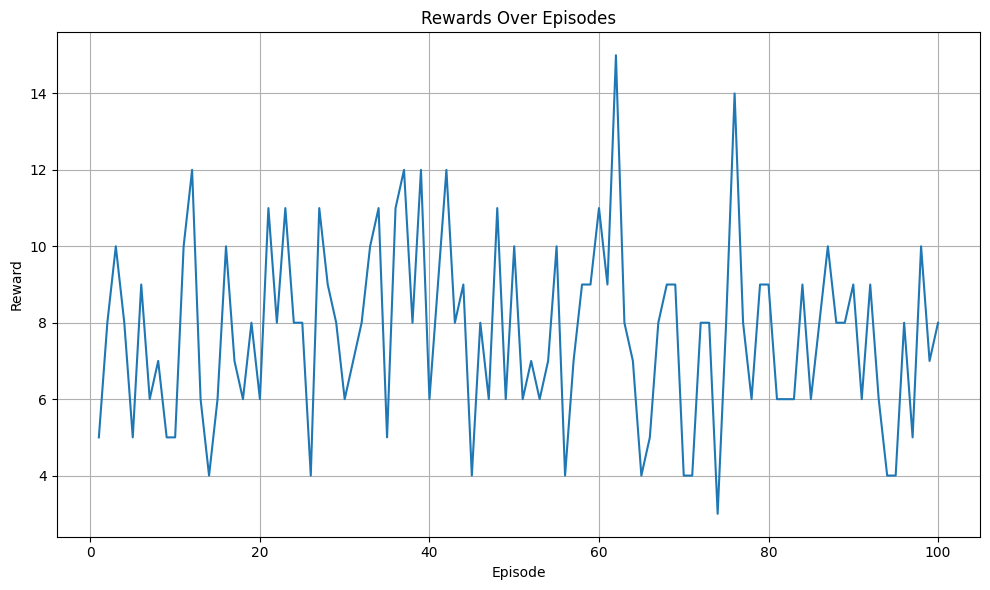

In [65]:
is_done = False
rewards = []

for n_ep in range(NUM_EPISODES):
    state, _ = env.reset()
    print('Episode: ', n_ep)
    total_reward = 0
    mask=[1.0,1.0,1.0,1.0,1.0,1.0]
    for i in range(T_MAX):
        action = agente_final1.select_action(state, mask,training=False)
        state, reward, is_done, truncated, info = env.step(action)
        mask=info['action_mask']
        total_reward = total_reward + reward
        env.render()
        if is_done:
            break
    rewards.append(total_reward)
draw_rewards(rewards)